In [ ]:
#Import Libralies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import os
import random as rn

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)


2.5.0


In [ ]:
# Function For Result Evaluation 
def metrics(y_true, y_pred):
    metrics = [
        r2_score(y_true=y_true, y_pred=y_pred), 
        np.sqrt(mean_squared_error(y_true=y_true, y_pred=y_pred)), 
        mean_absolute_error(y_true=y_true, y_pred=y_pred)
    ]
    
    return metrics

In [ ]:
# Function For Result Visualization
def yyplot(y_true, y_pred):
    yvalues = np.concatenate([y_true.flatten(), y_pred.flatten()])
    ymin, ymax, yrange = np.amin(yvalues), np.amax(yvalues), np.ptp(yvalues)
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(y_true, y_pred, s=1.0)
    plt.plot([ymin - yrange * 0.01, ymax + yrange * 0.01], [ymin - yrange * 0.01, ymax + yrange * 0.01], color="red", linestyle = "dashed")
    plt.grid(linestyle = "dashed")
    plt.xlim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.ylim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.xlabel('y: true value')
    plt.ylabel('y: predicted value')
    plt.title('True-Predicted Plot')
    plt.show()

    return fig

In [ ]:
# Function to fix random seed
def reset_seed(seed=0):
    os.environ['PYTHONHASHSEED'] = '0'
    rn.seed(seed) # Fixing the seed of a random function
    np.random.seed(seed) # Fixing the seed of numpy
    tf.random.set_seed(seed) # Fixing the seed of tensorflow

In [ ]:
#Data Loading
import glob

#folder_path = input("Enter the path of the folder where the data is stored.")
#folder_path = "../../02_Operating_Data/" #CGH Updated
folder_path=r"/content/drive/MyDrive/Colab Notebooks/CGH/AID/Dataset"

# folder_path example: "C:\Users\AB280\Documents\GitHub\AIO_Regression\Dataset_generate\hysys_output\lng_production"

# # If pkl format, 
# all_files = glob.glob(folder_path + "\*.pkl")
# print(all_files)

# list = []
# for file_name in all_files:
#     df_each = pd.read_pickle(file_name)
#     list.append(df_each)
    
# df = pd.concat(list, axis=0, ignore_index=True)
# df.head(100)


# If csv format, 
all_files = glob.glob(folder_path + "/*.csv") #Slash for colab. Backslash is for local runtime.
print(all_files) #To Print File Names

list = []
for file_name in all_files:
    df_each = pd.read_csv(file_name)
    list.append(df_each)
    
df = pd.concat(list, axis=0, ignore_index=True) #To combine all files
#df.to_csv('all_years_combined.csv', index=False)
#df.head(100)

['/content/drive/MyDrive/Colab Notebooks/CGH/AID/Dataset/dslng_operating_data_hourly_R3.csv']


In [ ]:
df=df.dropna()
#df.info()

In [ ]:
dict_X = {'Unnamed: 0':'Date',
    '041AI1806A.PV':   'FEED_N2',
    '041AI1806B.PV':   'FEED_C1',
    '041AI1806C.PV':   'FEED_C2',
    '041AI1806D.PV':   'FEED_C3',
    '041AI1806E.PV':   'FEED_iC4',
    '041AI1806F.PV':   'FEED_nC4',
    '041AI1806G.PV':   'FEED_C5+',
    '060TI4001.PV':   'AmbTemp_1',
    '060TI4002.PV':   'AmbTemp_2',
    '091TI4002.PV':   'AmbTemp_5',
    '051TI1401A.PV':   'AirTemp_A',
    '051TI1401B.PV':   'AirTemp_B',
    '051TI1401C.PV':   'AirTemp_C',
    '051TI1401D.PV':   'AirTemp_D',
    '051TI1401E.PV':   'AirTemp_E',
    '051PI1251.PV':   'P_HPMR',
    '051PFIC2940.MV':   'COLD_JT',
    '051FIC1051.MV':   'WARM_JT',
    '051AI1781A.PV':   'MR_N2',
    '051AI1781B.PV':   'MR_C1',
    '051AI1781C.PV':   'MR_C2',
    '051AI1781D.PV':   'MR_C3',
    '041TI1313.PV':   'MCHE_OUT',
    '041PI1203.PV':   'MCHE_P_IN',
    '041FIC2430.PV':   'LNG_Rundown',
    '041AI1806H.PV':   'LNG_Dens',

    '071FI1021A.PV':   'LNG_Loading',
    '051SI3203.PV':   'C3_GT_Speed',
    '051SI3113.PV':   'LPMR_GT_Speed',
    '051SI3403.PV':   'HPMR_GT_Speed',
    '051FI1081.PV':   'Fuel_Flow_C3_Driver',


    '051FI1083.PV':   'Fuel_Flow_LPMR_Driver',


    '051FI1085.PV':   'Fuel_Flow_HPMR_Driver',


    '051XI4055.PV':   'Helper_Motor_C3',
    '051XI5055.PV':   'Helper_Motor_LPMR',


    '051TI1307.PV':   'C3_CON_OUT',
    '051TI1311.PV':   'C3_SUB_OUT',
    '051TI1351.PV':   'LPMR_OUT',
    '051TI1352.PV':   'HPMR_OUT',

    '051FI3121_N.PV':   'MR_FLOW',
    '051FI3041_N.PV':   'C3_FLOW',
    '051PI3110.PV':  'LPMR_Suc_P',  #New Feature — Case 2 Input
    '051TI1370.PV':   'MR_Return_T',
    '041TI1306.PV':   'FEED_MCHE_IN_T'	 #Case 4 Input
}
col_names=df.columns.tolist()
new_names=[dict_X.get(each,each) for each in col_names]
df.columns=new_names
#df.to_csv("Col Names.csv",index=False)

In [ ]:
#Preparation for SpecPower Calculation
#As per Note-3, Holding Mode: Loading Rate ≒ 0 and Rundown Rate > 85% * Max
df = df[df["LNG_Loading"]<=0]
df = df[df["LNG_Rundown"]>=(df["LNG_Rundown"].max()*.85)]

#Calculations for LNG Prod & Others
df["LNG_Prod"]=df["LNG_Rundown"] * df["LNG_Dens"]/1000

df["Fuel_WtFlow_C3_Driver"]=df["Fuel_Flow_C3_Driver"]  / 22.414 * 17.44

df["C3_GT_Power"]=df["Fuel_WtFlow_C3_Driver"] * 50044 / (26.059873 * df["AmbTemp_2"] - 0.848894 * df["C3_GT_Speed"]  + 15378.1778218)

df["Fuel_WtFlow_LPMR_Driver"]=df["Fuel_Flow_LPMR_Driver"] / 22.414 * 17.44

df["LPMR_GT_Power"]=df["Fuel_WtFlow_LPMR_Driver"] * 50044 / (26.059873 * df["AmbTemp_2"] - 0.848894 * df["LPMR_GT_Speed"]  + 15378.1778218)

df["Fuel_WtFlow_HPMR_Driver"]=df["Fuel_Flow_HPMR_Driver"] / 22.414 * 17.44

df["HPMR_GT_Power"]=df["Fuel_WtFlow_HPMR_Driver"] * 50044 / (26.059873 * df["AmbTemp_2"] - 0.848894 * df["HPMR_GT_Speed"]  + 15378.1778218)

df["MCHE_BTM_DT"]=df["FEED_MCHE_IN_T"]-df["MR_Return_T"]
#SpecPower can be calculated now.
df["SpecPower"]=(df["C3_GT_Power"]+ df["LPMR_GT_Power"] + df["HPMR_GT_Power"] + df["Helper_Motor_C3"] + df["Helper_Motor_LPMR"]) / df["LNG_Prod"]
# oldcolname=df.columns.tolist()
# newcolname=[dict_X.get(each,each) for each in oldcolname]
# df.columns=newcolname
# df.to_csv("OperatingDatawithSpecPower.csv",index=False)
df=df.dropna() #Some Values might be zero and thus result in N/A.
#df.info()

In [ ]:
# explanatory variables
list_X = [
'FEED_N2',
'FEED_C1',
'FEED_C2',
'FEED_C3',
'MCHE_P_IN',
'AmbTemp_2',
'P_HPMR',
'MR_N2',
'MR_C1',
'MR_C2',
'MR_C3',
'MCHE_BTM_DT', 
'LPMR_Suc_P',
'MCHE_OUT',
'C3_CON_OUT'
]

# target variable
list_y = [
    'SpecPower' 
]

In [ ]:
#Standarditizing the data 
sc_X = preprocessing.StandardScaler()
sc_y = preprocessing.StandardScaler()

X = df.loc[:, list_X].values
y = df.loc[:, list_y].values

X_std = sc_X.fit_transform(X)
y_std = sc_y.fit_transform(y)

#sc_X.fit(X=X)
#sc_y.fit(X=y)
#X_std.mean(axis=0), y_std.mean(axis=0)
print("Sc_X mean is ",sc_X.mean_)
print("X_std mean is ",X_std.mean(axis=0))

Sc_X mean is  [   0.76706254   92.57357827    3.65624039    1.75297559   48.33155306
   27.69565032   52.38221927    6.64462314   41.05102961   41.57099343
   10.2697183     4.54018719    1.95952219 -153.99200729   50.7344806 ]
X_std mean is  [-8.26029780e-16 -1.23792235e-15 -9.33772794e-16  5.02800735e-15
 -1.23545324e-14 -5.02800735e-16  8.29845678e-15 -3.23229044e-16
  7.18286765e-17 -4.66886397e-16 -9.33772794e-16  1.43657353e-16
  8.97858456e-17  2.15845173e-14 -1.79571691e-15]


In [ ]:
from pickle import dump
dump(X_std, open("test.pkl", 'wb')) #due to No Save in RF

In [ ]:
import pickle
loaded_model = pickle.load(open('test.pkl', 'rb'))

In [ ]:
loaded_model.mean(axis=0)

array([-8.26029780e-16, -1.23792235e-15, -9.33772794e-16,  5.02800735e-15,
       -1.23545324e-14, -5.02800735e-16,  8.29845678e-15, -3.23229044e-16,
        7.18286765e-17, -4.66886397e-16, -9.33772794e-16,  1.43657353e-16,
        8.97858456e-17,  2.15845173e-14, -1.79571691e-15])

In [ ]:
#Data  Separating
from sklearn.utils import shuffle
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.10, random_state=0,shuffle=False)

In [ ]:
# Dimension Reduction for outputs
print(y_train.shape)
y_train_1 = np.ravel(y_train)
y_test_1 = np.ravel(y_test)
y_train_1.shape

(11395, 1)


(11395,)

In [ ]:
forest = RandomForestRegressor(n_estimators=100, random_state=0)
#for each in algo_list:
rgr = forest.fit(X_train,y_train_1)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print("R^2 train:",rgr.__class__.__name__ ,rgr.score(X_train, y_train_1))
print("R^2 test:",rgr.__class__.__name__ , rgr.score(X_test, y_test_1))

R^2 train: RandomForestRegressor 0.9921333920079706
R^2 test: RandomForestRegressor -1.084114496873279


In [ ]:
#Saving the model
filename = '/content/drive/MyDrive/Colab Notebooks/CGH/AID/Step1_Random Forest Regression/Output/RandomForest_model.sav'
#import pickle
from pickle import dump
dump(forest, open(filename, 'wb')) #due to No Save in RF

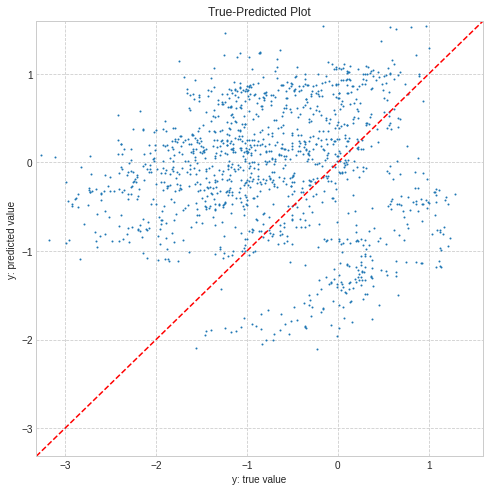

In [ ]:
fig = yyplot(y_true = y_test, y_pred = y_test_pred)

In [ ]:

# load the model from disk.
loaded_model = pickle.load(open(filename, 'rb'))
y_train_pred2 = loaded_model.predict(X_train)
y_test_pred2 = loaded_model.predict(X_test)
result = loaded_model.score(X_test, y_test_1)


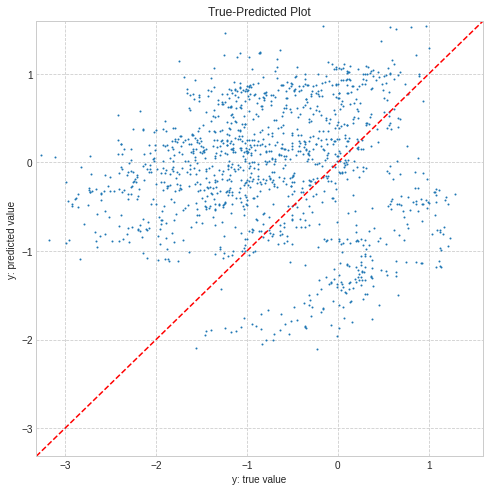

In [ ]:
fig = yyplot(y_true = y_test, y_pred = y_test_pred2)

In [ ]:
%matplotlib inline
df_inputs = df[list_X] 
inputs_num = len(df_inputs.columns)
importances = forest.feature_importances_
indi = np.argsort(importances)[::-1] #descending order
label = df_inputs.columns
importances = importances[indi] #importanance
#label = label[indi] #It will be in PV no.
label=[label[each] for each in indi]
print(label)

['LPMR_Suc_P', 'MR_C2', 'C3_CON_OUT', 'MCHE_OUT', 'AmbTemp_2', 'MCHE_P_IN', 'MR_N2', 'P_HPMR', 'MCHE_BTM_DT', 'MR_C3', 'FEED_C3', 'MR_C1', 'FEED_N2', 'FEED_C1', 'FEED_C2']


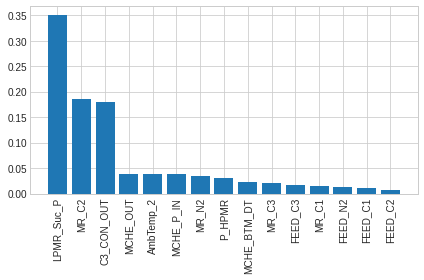

In [ ]:
plt.bar(range(inputs_num),importances)
plt.xticks(range(inputs_num),label,rotation=90)
plt.grid(True)
plt.tick_params(labelsize=10)
plt.tight_layout()

To further study,

In [ ]:
# # Convert the model into tensorflowjs
# import tensorflowjs as tfjs
# tfjs.converters.save_keras_model(self.model, './model-mrenthalpy')